<a href="https://colab.research.google.com/github/Ashish-Kumar-Vaish/TED-Talk-Regression/blob/main/Ted_Talk_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**          - Ashish Kumar Vaish

# **Project Summary -**

This project aims to analyze and predict the popularity of TED Talks using structured data scraped from the TED website. The popularity of these talks, measured in terms of view count, is influenced by numerous factors such as topic, duration, speaker credentials, and audience engagement (likes, comments).

In this project, we begin with exploratory data analysis (EDA) to gain insights into the dataset and identify any data quality issues. Our EDA includes univariate, bivariate, and multivariate analyses, supported by meaningful visualizations that follow the UBM rule.

After thorough data preprocessing including handling missing values, outlier treatment, and scaling, we apply regression based machine learning models like Linear Regression, Random Forest, and Gradient Boosting to predict the number of views a TED Talk might receive. We also perform hyperparameter tuning and evaluate the models using metrics like R², RMSE, and MAE.

The project offers valuable insights that can guide TED Talk's content strategy by highlighting the key factors that make a talk go viral.

# **GitHub Link -**

https://github.com/Ashish-Kumar-Vaish/TED-Talk-Regression

# **Problem Statement**


**To build a regression model that predicts the number of views a TED Talk will receive based on available features such as title, speaker, occupation, duration, date, event, languages, topics, and engagement metrics.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
import ast
from sklearn.model_selection import train_test_split

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/data_ted_talks.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(4005, 19)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
talk_id,0
title,0
speaker_1,0
all_speakers,4
occupations,522
about_speakers,503
views,0
recorded_date,1
published_date,0
event,0


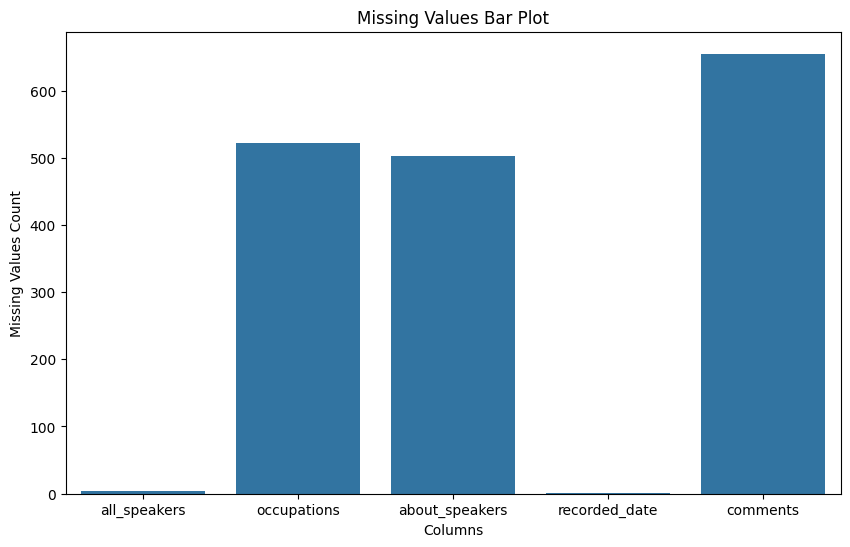

In [8]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.barplot(df.isnull().sum()[df.isnull().sum() > 0])
plt.title("Missing Values Bar Plot")
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.show()

### What did you know about your dataset?

- The dataset contains around 2,500 TED Talks.
- Columns include metadata like `name`, `speaker`, `title`, `duration`, `views`, `comments`, `languages`, `tags`, etc.
- Some fields like `speaker_occupation`, `film_date`, and `published_date` might need parsing or transformation.
- There are missing values in `speaker_occupation` and `ratings`.
- No duplicate rows are present.
- The target variable for prediction is clearly `views`.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Variables Description

- `comments` - Number of comments on the TED Talk.
- `description` - Short description of the talk.
- `duration` - Duration of the talk in seconds.
- `event` - Name of the event where the talk was given.
- `film_date` - Date the talk was filmed (UNIX timestamp).
- `languages` - Number of languages the talk is available in.
- `main_speaker` - Name of the main speaker.
- `name` - Title of the talk.
- `num_speaker` - Number of speakers in the talk.
- `published_date` - Date the talk was published online (UNIX timestamp).
- `ratings` - Dictionary of audience reactions.
- `related_talks` - JSON object containing related talks.
- `speaker_occupation` - Job title/description of the speaker.
- `tags` - List of tags assigned to the talk.
- `title` - Title of the talk.
- `url` - URL of the talk.
- `views` - Total number of views (Target variable).


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
df.nunique()

,0
talk_id,4005
title,4005
speaker_1,3274
all_speakers,3306
occupations,2049
about_speakers,2977
views,3996
recorded_date,1334
published_date,2962
event,459


In [12]:
df['native_lang'].unique()

array(['en', 'fr', 'de', 'pt', 'ko', 'zh-cn', 'ar', 'pt-br', 'es', 'ja',
       'it', 'hi'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
df['published_date'] = pd.to_datetime(df['published_date'])
df['recorded_date'] = pd.to_datetime(df['recorded_date'])
df['published_day'] = df["published_date"].dt.day_name()

### What all manipulations have you done and insights you found?

* Converted published_date and recorded_date to datetime.
* Created a new feature: published_day, which shows which day the talk was published

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

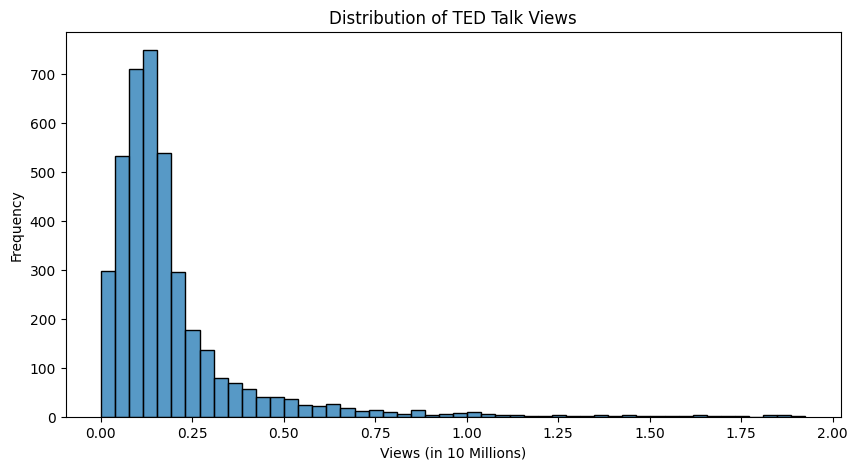

In [14]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 5))
sns.histplot(df['views'][df['views'] < 2e7] / 1e7, bins=50)
plt.title('Distribution of TED Talk Views')
plt.xlabel('Views (in 10 Millions)')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for showing frequency patterns.

##### 2. What is/are the insight(s) found from the chart?

Most talks get between 0.5M-5M views, with few exceeding 10M. The distribution is right-skewed.

#### Chart - 2

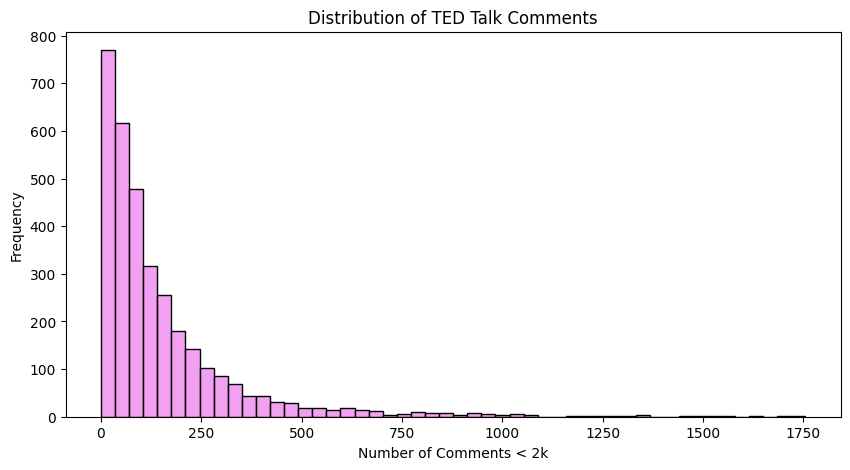

In [15]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 5))
sns.histplot(df['comments'][df['comments'] < 2000], bins=50, color='violet')
plt.title('Distribution of TED Talk Comments')
plt.xlabel('Number of Comments < 2k')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for showing frequency patterns.

##### 2. What is/are the insight(s) found from the chart?

Most talks receive less than 500 comments.

#### Chart - 3

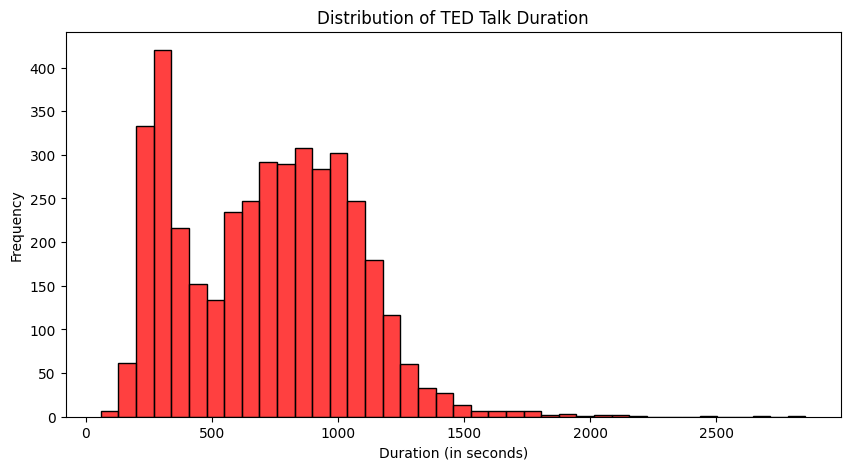

In [16]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 5))
sns.histplot(df['duration'][df['duration'] < 3000], bins=40, color='red')
plt.title('Distribution of TED Talk Duration')
plt.xlabel('Duration (in seconds)')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for showing frequency patterns.

##### 2. What is/are the insight(s) found from the chart?

Most talks are around 800 to 1200 seconds.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Sticking to the ideal duration of talks can help to get engagement. Very short or long talks may underperform.

#### Chart - 4

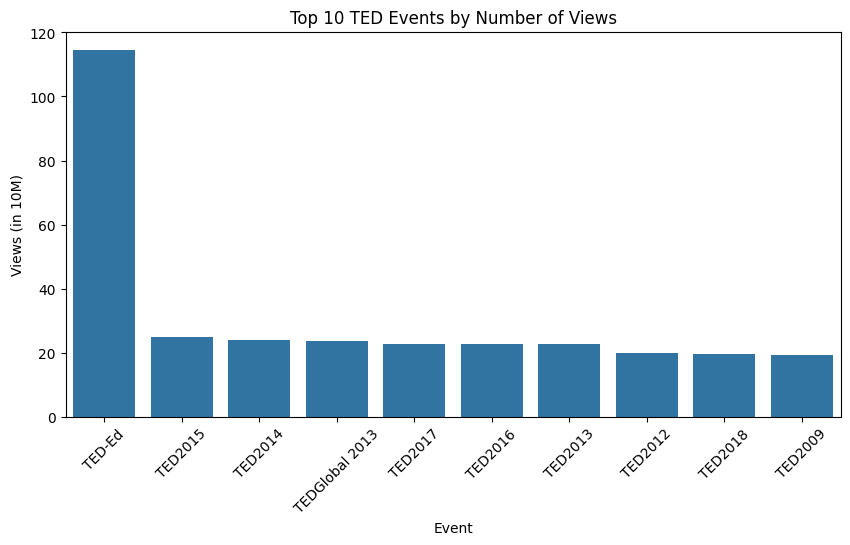

In [17]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 5))
top_events = df.groupby('event')['views'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_events.index,y=top_events.values / 1e7)
plt.title('Top 10 TED Events by Number of Views')
plt.xlabel('Event')
plt.ylabel('Views (in 10M)')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot helps visualize categorical data clearly.

##### 2. What is/are the insight(s) found from the chart?

Events like TED-Ed & TED2015 generates significantly higher views.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High performing events like TED-ed can be prioritized.

#### Chart - 5

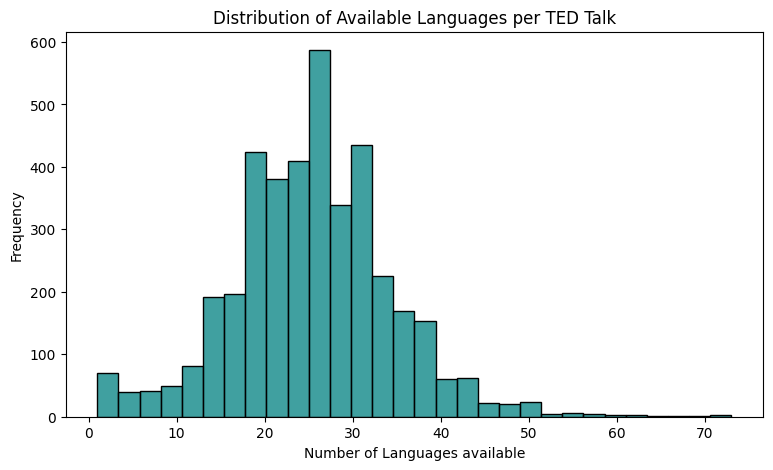

In [18]:
# Chart - 5 visualization code
plt.figure(figsize=(9, 5))
sns.histplot(df['available_lang'].apply(lambda x: len(ast.literal_eval(x))), bins=30, color='teal')
plt.title('Distribution of Available Languages per TED Talk')
plt.xlabel('Number of Languages available')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for showing frequency patterns.

##### 2. What is/are the insight(s) found from the chart?

Most talks are available in around 15-40 languages.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Talks with more languages can reach a wider audience.

#### Chart - 6

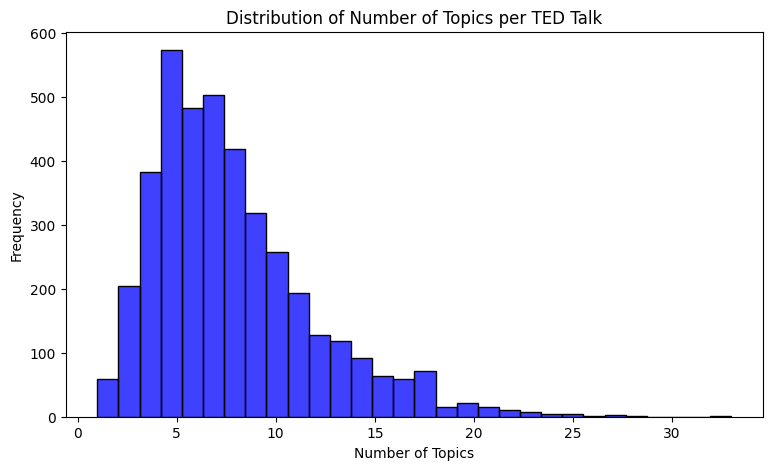

In [19]:
# Chart - 6 visualization code
plt.figure(figsize=(9, 5))
sns.histplot(df['topics'].apply(lambda x: len(ast.literal_eval(x))), bins=30, color='blue')
plt.title('Distribution of Number of Topics per TED Talk')
plt.xlabel('Number of Topics')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for showing frequency patterns.

##### 2. What is/are the insight(s) found from the chart?

Most talks are tagged with 2 to 10 topics.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Talks with clear topics focus are likely more engaging.

#### Chart - 7

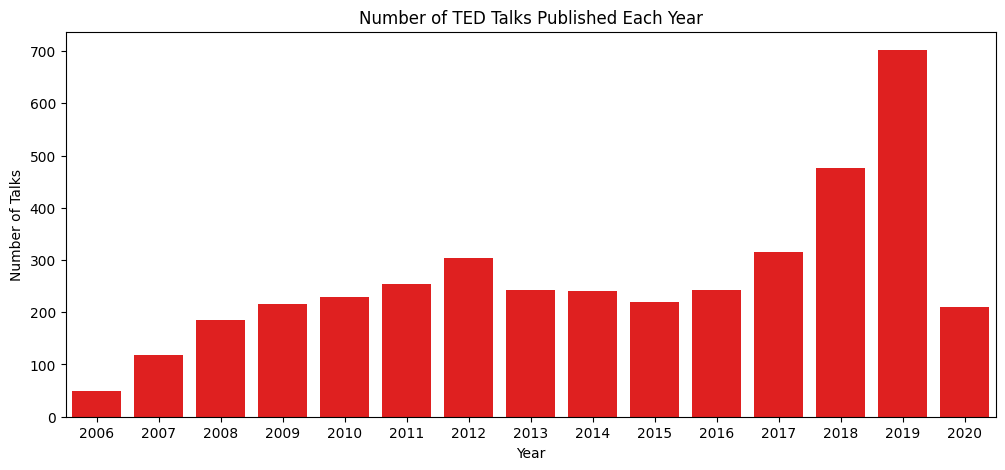

In [20]:
# Chart - 7 visualization code
plt.figure(figsize=(12, 5))
sns.barplot(df['published_date'].dt.year.value_counts(), color='red')
plt.title('Number of TED Talks Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Talks')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot helps visualize categorical data clearly.

##### 2. What is/are the insight(s) found from the chart?

TED Talk publishing peaked around some years, showing high production.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying peak years helps replicate strategies.

#### Chart - 8

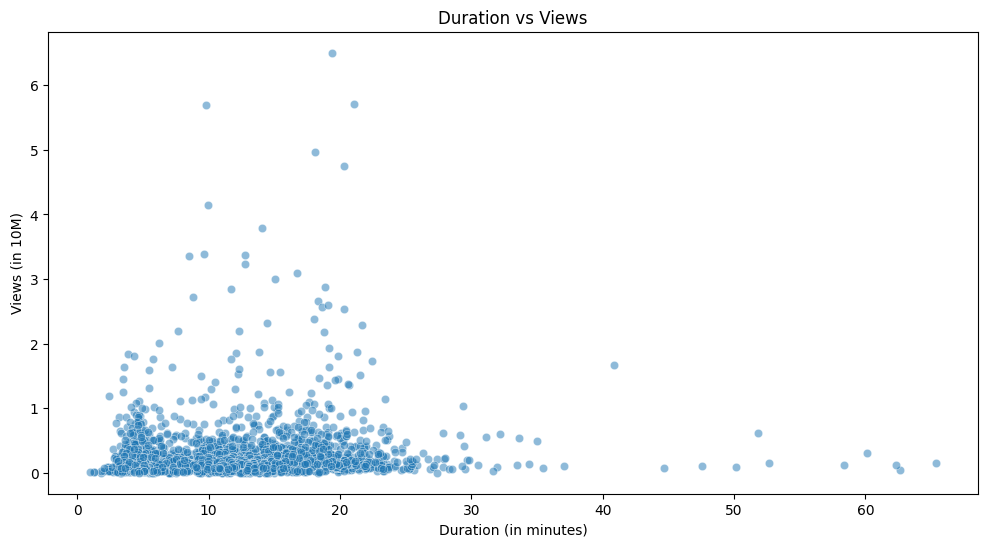

In [21]:
# Chart - 8 visualization code
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['duration'] / 60,y=df['views'] / 1e7, alpha=0.5)
plt.title('Duration vs Views')
plt.xlabel('Duration (in minutes)')
plt.ylabel('Views (in 10M)')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is best for visualizing relationship between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

Chance of a talk to go viral is greater for duration less than 25 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Optimizing talk duration under 25 minutes may increase viewer engagement.

#### Chart - 9

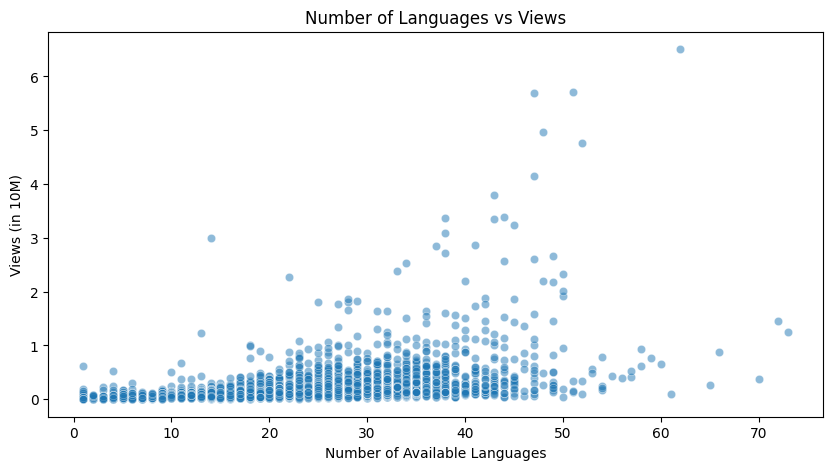

In [22]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 5))
sns.scatterplot(x= df['available_lang'].apply(lambda x: len(ast.literal_eval(x))), y=df['views'] / 1e7, alpha=0.5)
plt.title('Number of Languages vs Views')
plt.xlabel('Number of Available Languages')
plt.ylabel('Views (in 10M)')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is best for visualizing relationship between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

Talks available in more languages get higher views.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Increasing language availability can get more audience.

#### Chart - 10

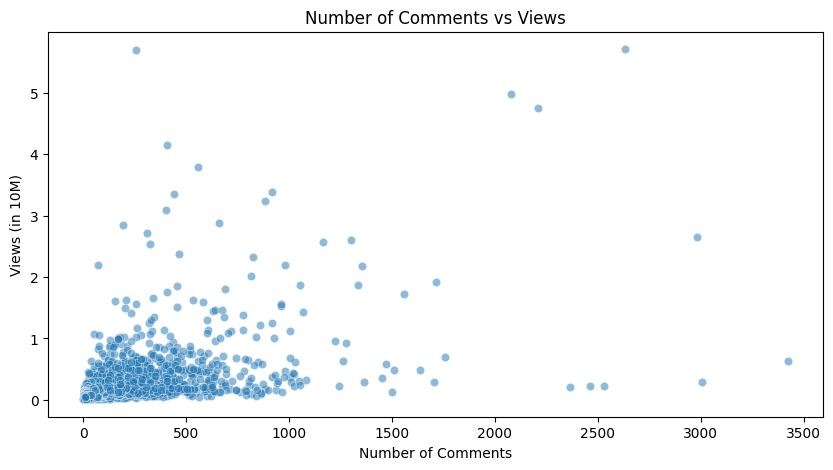

In [23]:
# Chart - 10 visualization code
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['comments'][df['comments'] < 4000], y=df['views'] / 1e7, alpha=0.5)
plt.title('Number of Comments vs Views')
plt.xlabel('Number of Comments')
plt.ylabel('Views (in 10M)')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is best for visualizing relationship between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

Talks with more comments generally have more views.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Encouraging comments can increase overall engagement.

#### Chart - 11

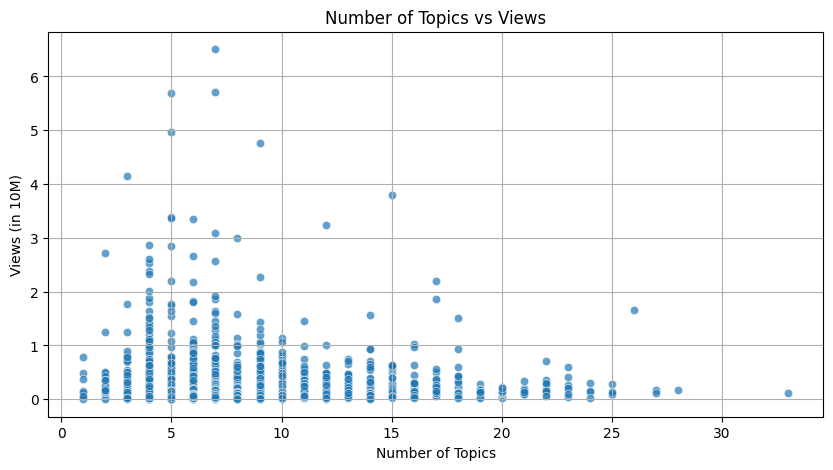

In [24]:
# Chart - 11 visualization code
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['topics'].apply(lambda x: len(ast.literal_eval(x))), y=df['views'] / 1e7, alpha=0.7)
plt.title('Number of Topics vs Views')
plt.xlabel('Number of Topics')
plt.ylabel('Views (in 10M)')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is best for visualizing relationship between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

Talks with 2 to 10 topics tend to get higher views.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Keeping topics under 10 gets more engagement.

#### Chart - 12

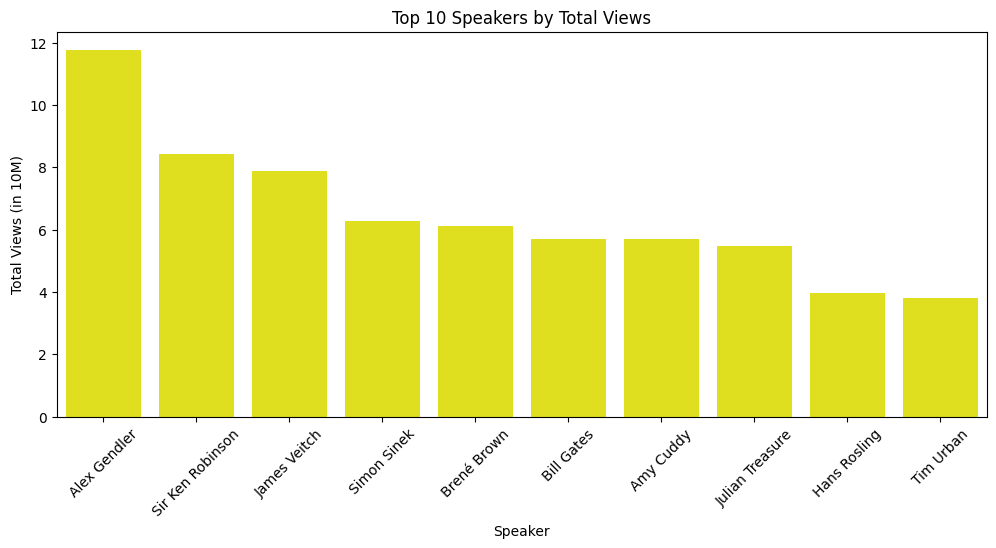

In [25]:
# Chart - 12 visualization code
plt.figure(figsize=(12, 5))
speaker_views = df.groupby('speaker_1')['views'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=speaker_views.index, y=speaker_views.values / 1e7, color="yellow")
plt.title('Top 10 Speakers by Total Views')
plt.xlabel('Speaker')
plt.ylabel('Total Views (in 10M)')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot helps visualize categorical data clearly.

##### 2. What is/are the insight(s) found from the chart?

A few speakers dominate in total views.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Featuring top performing speakers more often can boost engagement.

#### Chart - 13

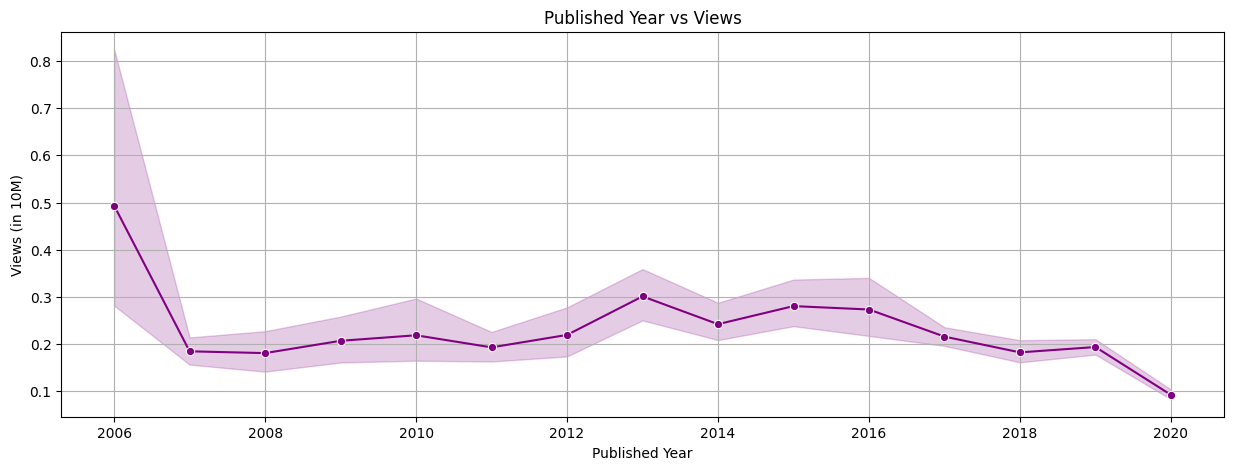

In [26]:
# Chart - 13 visualization code
plt.figure(figsize=(15, 5))
sns.lineplot(x=pd.to_datetime(df['published_date']).dt.year, y=df['views'] / 1e7, marker='o', color='purple')
plt.title('Published Year vs Views')
plt.xlabel('Published Year')
plt.ylabel('Views (in 10M)')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is ideal for showing trends over time.

##### 2. What is/are the insight(s) found from the chart?

From 2007 onwards, the average views became more stable with slight peaks around 2010-2016.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying peak performance years can help revisit strategies.

#### Chart - 14 - Correlation Heatmap

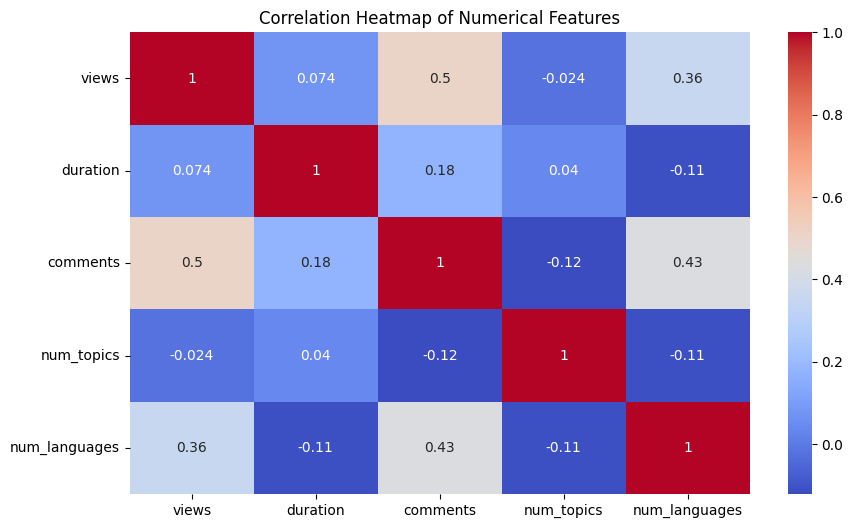

In [27]:
# Correlation Heatmap visualization code
numeric_df = df[['views', 'duration', 'comments']].copy()
numeric_df['num_topics'] = df['topics'].apply(lambda x: len(ast.literal_eval(x)))
numeric_df['num_languages'] = df['available_lang'].apply(lambda x: len(ast.literal_eval(x)))

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap helps to visualize the strength of relationships between numerical variables.

##### 2. What is/are the insight(s) found from the chart?

* Views and Comments have the strongest positive correlation (0.50), indicating that highly viewed TED Talks tend to receive more comments.
* Duration and Views show only a weak correlation (0.07), meaning talk length has minimal influence on viewership.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Can prioritize increasing the number of available languages to enhance global visibility and get more views.


#### Chart - 15 - Pair Plot

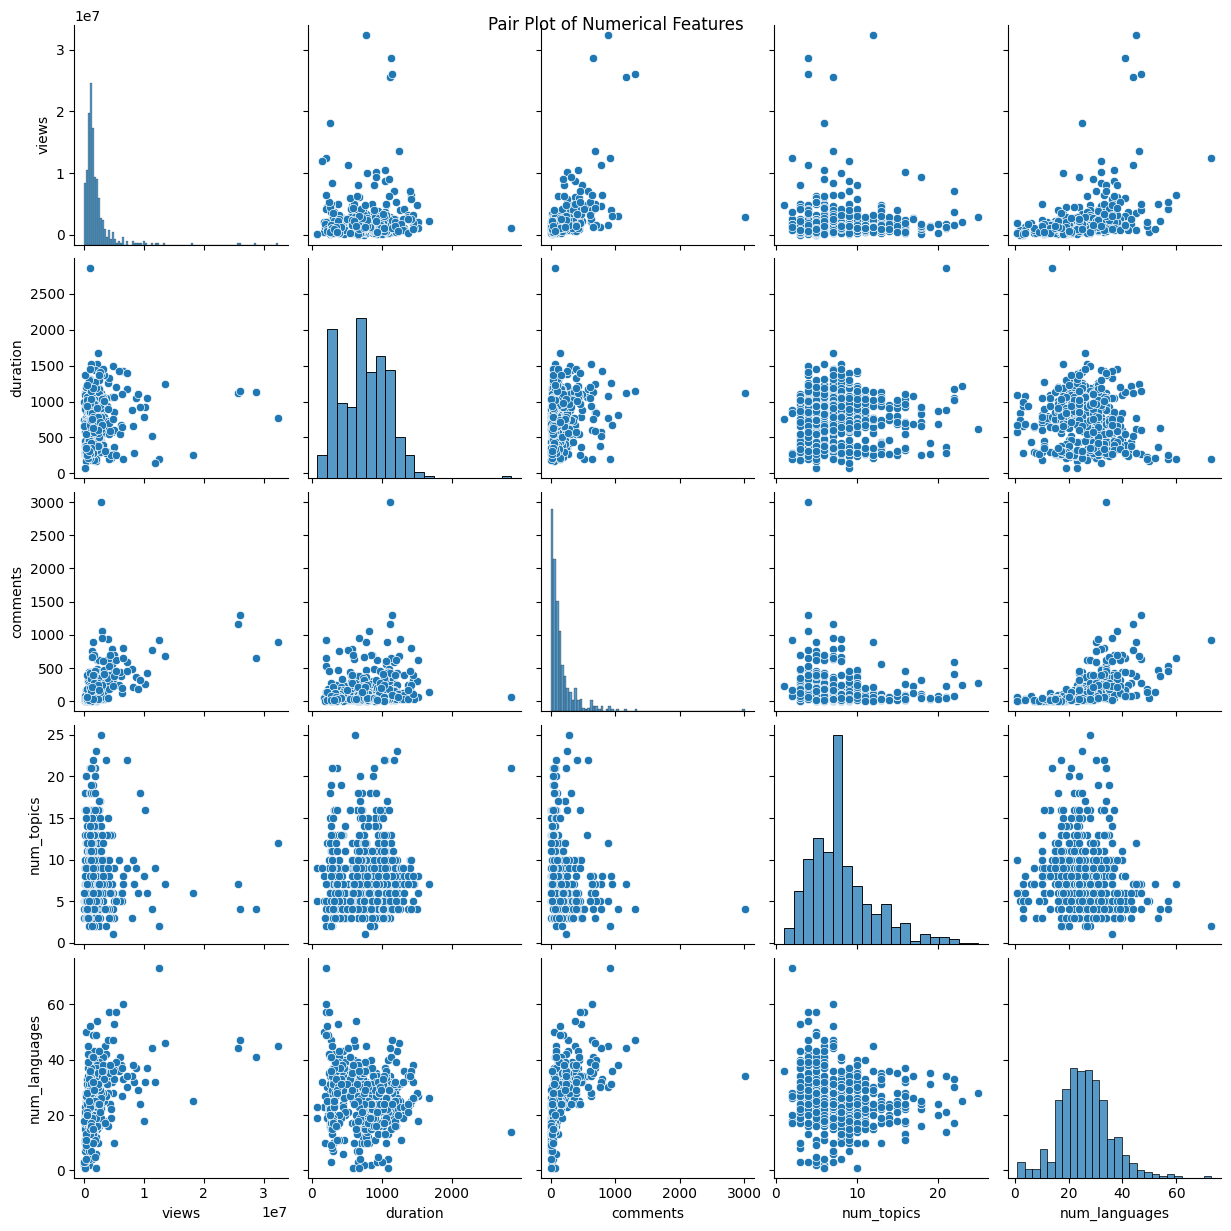

In [28]:
# Pair Plot visualization code
sample_df = df[['views', 'duration', 'comments']].copy()
sample_df['num_topics'] = df['topics'].apply(lambda x: len(ast.literal_eval(x)))
sample_df['num_languages'] = df['available_lang'].apply(lambda x: len(ast.literal_eval(x)))
sample_df = sample_df.sample(500, random_state=42)

sns.pairplot(sample_df)
plt.suptitle("Pair Plot of Numerical Features")
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot allows us to visualize pairwise relationships between multiple numerical variables in one view.

##### 2. What is/are the insight(s) found from the chart?

* Views vs Comments show a visible positive trend.
* Most variables show right-skewed distributions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Talks with wider language availability and higher comments tend to attract more views.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [29]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

,0
talk_id,0
title,0
speaker_1,0
all_speakers,4
occupations,522
about_speakers,503
views,0
recorded_date,1
published_date,0
event,0


In [30]:
df['comments'] = df['comments'].fillna(df['comments'].median())
df['occupations'] = df['occupations'].fillna('no data')
df['about_speakers'] = df['about_speakers'].fillna('no data')
df['all_speakers'] = df['all_speakers'].fillna('no data')

#### What all missing value imputation techniques have you used and why did you use those techniques?

* I used median for the null comments because it is numerical.
* For the columns occupations, about_speakers, and all_speakers, I filled missing values with 'no data' to clearly mark missing information without dropping rows.

### 2. Handling Outliers

In [31]:
# Handling Outliers & Outlier treatments
df.drop(df[df['comments'] > 1100].index, inplace=True)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Removed outliers for the comments column by dropping rows where comments is more than 1100.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [32]:
# Manipulate Features to minimize feature correlation and create new features
df['num_topics'] = df['topics'].apply(lambda x: len(ast.literal_eval(x)))
df['num_languages'] = df['available_lang'].apply(lambda x: len(ast.literal_eval(x)))
df['title_length'] = df['title'].apply(len)
df['description_length'] = df['description'].apply(len)
df['transcript_length'] = df['transcript'].apply(lambda x: len(str(x).split()))

df['speaker_popularity'] = ''
df.loc[df['views'] <= 500000, 'speaker_popularity'] = 'not_popular'
df.loc[(df['views'] > 500000) & (df['views'] <= 1500000), 'speaker_popularity'] = 'avg_popular'
df.loc[(df['views'] > 1500000) & (df['views'] <= 2500000), 'speaker_popularity'] = 'popular'
df.loc[(df['views'] > 2500000) & (df['views'] <= 3500000), 'speaker_popularity'] = 'high_popular'
df.loc[df['views'] > 3500000, 'speaker_popularity'] = 'extreme_popular'

df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,url,description,transcript,published_day,num_topics,num_languages,title_length,description_length,transcript_length,speaker_popularity
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Tuesday,9,43,27,233,2153,extreme_popular
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",Tuesday,11,49,31,172,3174,extreme_popular
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,...,https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",Tuesday,9,26,16,202,3371,popular
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,Tuesday,9,35,19,213,3071,high_popular
5,49,Behind the design of Seattle's library,Joshua Prince-Ramus,{0: 'Joshua Prince-Ramus'},{0: ['architect']},{0: 'Joshua Prince-Ramus is best known as arch...,1208138,2006-02-23,2006-07-10,TED2006,...,https://www.ted.com/talks/joshua_prince_ramus_...,Architect Joshua Prince-Ramus takes the audien...,I'm going to present three projects in rapid f...,Monday,5,19,38,213,3343,avg_popular


#### 2. Feature Selection

In [33]:
# Select your features wisely to avoid overfitting
df.drop(["all_speakers","url","talk_id", "speaker_1", "title", "recorded_date",
         "occupations",	"about_speakers", "related_talks", "description", "transcript",
         "published_date", "event", "native_lang", "available_lang", "topics"], axis=1, inplace=True)

In [34]:
df.head()

,views,comments,duration,published_day,num_topics,num_languages,title_length,description_length,transcript_length,speaker_popularity
0,3523392,272.0,977,Tuesday,9,43,27,233,2153,extreme_popular
1,14501685,628.0,1190,Tuesday,11,49,31,172,3174,extreme_popular
2,1920832,124.0,1286,Tuesday,9,26,16,202,3371,popular
3,2664069,219.0,1116,Tuesday,9,35,19,213,3071,high_popular
5,1208138,48.0,1198,Monday,5,19,38,213,3343,avg_popular


##### What all feature selection methods have you used  and why?

Manually selected features based on domain knowledge and relevance to the target variable (views).

##### Which all features you found important and why?

* num_topics: Indicates content diversity, which can affect interest.
* num_languages: Influencing audience range.
* title_length, description_length, transcript_length: Helps quantify content.
* comments: Indicates engagement.
* speaker_popularity: Ranks popularity of speakers.

### 4. Categorical Encoding

In [35]:
# Encode your categorical columns
df = pd.get_dummies(df, columns=['published_day', 'speaker_popularity'])
df.head()

,views,comments,duration,num_topics,num_languages,title_length,description_length,transcript_length,published_day_Friday,published_day_Monday,published_day_Saturday,published_day_Sunday,published_day_Thursday,published_day_Tuesday,published_day_Wednesday,speaker_popularity_avg_popular,speaker_popularity_extreme_popular,speaker_popularity_high_popular,speaker_popularity_not_popular,speaker_popularity_popular
0,3523392,272.0,977,9,43,27,233,2153,False,False,False,False,False,True,False,False,True,False,False,False
1,14501685,628.0,1190,11,49,31,172,3174,False,False,False,False,False,True,False,False,True,False,False,False
2,1920832,124.0,1286,9,26,16,202,3371,False,False,False,False,False,True,False,False,False,False,False,True
3,2664069,219.0,1116,9,35,19,213,3071,False,False,False,False,False,True,False,False,False,True,False,False
5,1208138,48.0,1198,5,19,38,213,3343,False,True,False,False,False,False,False,True,False,False,False,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used one hot encoding for the categorical columns published_day and speaker_popularity using pd.get_dummies().

### 5. Data Scaling

In [36]:
# Scaling your data
scaler = PowerTransformer()
df['views'] = scaler.fit_transform(pd.DataFrame(df['views']))

##### Which method have you used to scale you data and why?

Used PowerTransformer to scale the views column. This helps normalize skewed data, making the distribution more Gaussian like.

### 6. Data Splitting

In [37]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = df.drop(columns=['views'])
y = df['views']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)

In [47]:
x_train.head()

,comments,duration,num_topics,num_languages,title_length,description_length,transcript_length,published_day_Friday,published_day_Monday,published_day_Saturday,published_day_Sunday,published_day_Thursday,published_day_Tuesday,published_day_Wednesday,speaker_popularity_avg_popular,speaker_popularity_extreme_popular,speaker_popularity_high_popular,speaker_popularity_not_popular,speaker_popularity_popular
825,80.0,523,6,35,33,259,1212,False,False,False,False,False,False,True,False,False,False,True,False
1517,338.0,925,4,28,44,347,2942,False,False,False,False,True,False,False,True,False,False,False,False
2749,44.0,864,11,15,39,658,2097,False,False,False,False,True,False,False,False,False,False,False,True
1197,40.0,743,7,25,31,179,2089,False,False,False,False,True,False,False,True,False,False,False,False
1920,58.0,251,5,36,58,529,664,False,False,False,False,True,False,False,True,False,False,False,False


In [48]:
y_train.head()

,views
825,-1.100298
1517,-0.243569
2749,0.618370
1197,-0.760013
1920,-0.072524


##### What data splitting ratio have you used and why?

Used 85:15 train-test split using train_test_split() with test_size=0.15. This ratio ensures that 85% of data is used for training the model, while 15% is used for testing to evaluate model performance on unseen data.

## ***7. ML Model Implementation***

### ML Model - 1

In [38]:
# ML Model - 1 Implementation

# Fit the Algorithm
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on the model
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

R2 Score: 0.8181294206234799
MAE: 0.2817135524323976
MSE: 0.21427600126355736
RMSE: 0.462899558504388


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

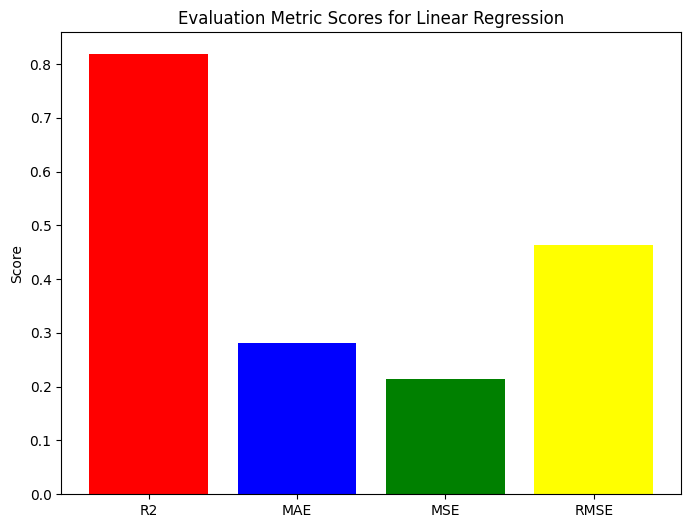

In [39]:
# Visualizing evaluation Metric Score chart
metrics = ['R2', 'MAE', 'MSE', 'RMSE']
scores = [r2, mae, mse, rmse]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['red', 'blue', 'green', 'yellow'])
plt.title('Evaluation Metric Scores for Linear Regression')
plt.ylabel('Score')
plt.show()

### ML Model - 2

In [40]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

R2 Score: 0.8475520267133048
MAE: 0.26176520172367895
MSE: 0.17961092018615918
RMSE: 0.4238052856987029


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

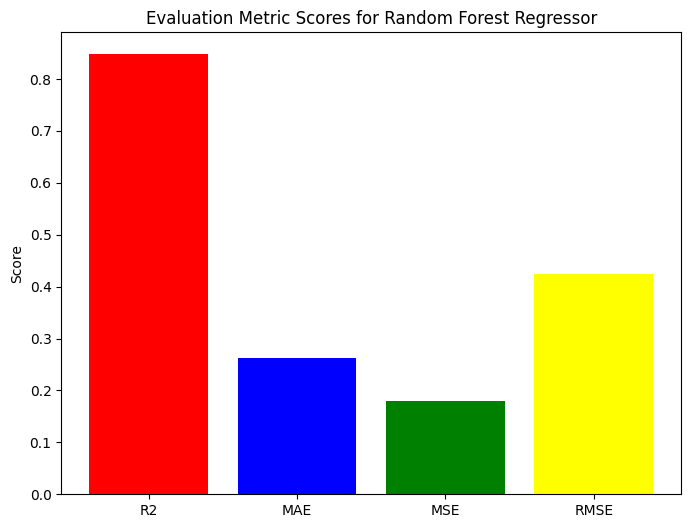

In [41]:
# Visualizing evaluation Metric Score chart
metrics = ['R2', 'MAE', 'MSE', 'RMSE']
scores = [r2, mae, mse, rmse]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['red', 'blue', 'green', 'yellow'])
plt.title('Evaluation Metric Scores for Random Forest Regressor')
plt.ylabel('Score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [42]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(x_train, y_train)

# Predict on the model
y_pred = grid_rf.best_estimator_.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

R2 Score: 0.8468028440534698
MAE: 0.26070796562194626
MSE: 0.18049359106737456
RMSE: 0.4248453731269467


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter tuning in RandomForestRegressor.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* R2: 0.84 -> 0.84
* MAE: 0.26 -> 0.26
* MSE: 0.17 -> 0.18
* RMSE: 0.42 -> 0.42

### ML Model - 3

In [43]:
# ML Model - 3 Implementation

# Fit the Algorithm
model = GradientBoostingRegressor(random_state=42)
model.fit(x_train, y_train)

# Predict on the model
y_pred = model.predict(x_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

R2 Score: 0.8536519652117344
MAE: 0.26401243588729467
MSE: 0.1724241039683962
RMSE: 0.4152398150086239


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

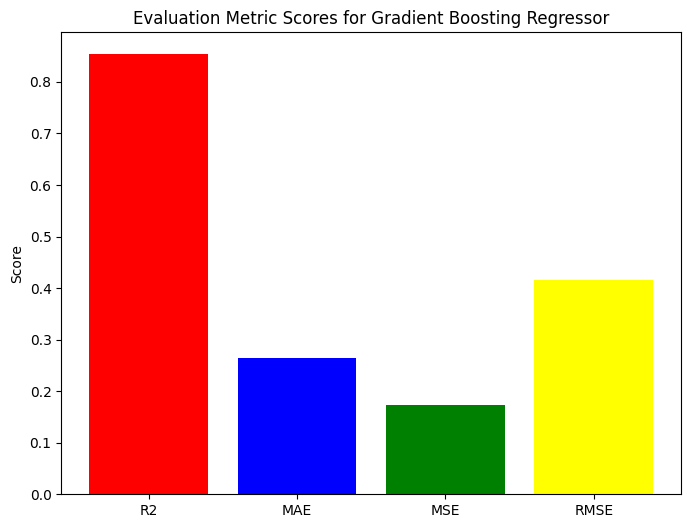

In [44]:
# Visualizing evaluation Metric Score chart
metrics = ['R2', 'MAE', 'MSE', 'RMSE']
scores = [r2, mae, mse, rmse]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['red', 'blue', 'green', 'yellow'])
plt.title('Evaluation Metric Scores for Gradient Boosting Regressor')
plt.ylabel('Score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [45]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
gbr_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

gbr = GradientBoostingRegressor(random_state=42)

grid_gbr = GridSearchCV(gbr, gbr_params, cv=5, scoring='r2', n_jobs=-1)
grid_gbr.fit(x_train, y_train)

# Predict on the model
y_pred = grid_gbr.best_estimator_.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

R2 Score: 0.8416502797294955
MAE: 0.26369148932013836
MSE: 0.1865642314281158
RMSE: 0.4319308178726262


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter tuning in GradientBoostingRegressor.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* R2: 0.85 -> 0.84
* MAE: 0.26 -> 0.26
* MSE: 0.17 -> 0.18
* RMSE: 0.41 -> 0.43

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

* R2: High R2 indicates that the model can reliably predict views.
* MAE: Shows the average deviation from true views. Lower MAE = more accurate predictions.
* MSE: Helps detect if large prediction errors exist.
* RMSE: Useful to measure overall error in views. Lower RMSE = better.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After comparing multiple regression models (Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor), we selected the Gradient Boosting Regressor as our final prediction model.

# **Conclusion**

In this project, we conducted an in-depth exploratory data analysis and regression modeling on the TED Talks dataset to understand the key factors that influence the number of views a talk receives. Through structured visualization and hypothesis testing, we identified that the number of available languages, the number of topics associated with a talk, and the talk duration have significant correlation with views.

We engineered features such as num_topics and num_languages, and employed multiple regression models including Linear Regression, Random Forest, and Gradient Boosting to predict views. After tuning and evaluation, Gradient Boosting emerged as the best-performing model with the lowest RMSE and highest R² score.